In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données d entraînement
xtrain = pd.read_csv('application_train.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d entraînement: ', xtrain.shape)
xtrain.head(10)

forme des données d entraînement:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Fonctionnalités  des données test
xtest = pd.read_csv('application_test.csv', sep = ',', low_memory=False )
#xtest = convert_types(xtest, print_info=True)
print('forme des fonctionnalités  des données test: ', xtest.shape)
xtest.head(10)

forme des fonctionnalités  des données test:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
train_control = pd.read_csv('application_train_NETTOYEES_NEWS_FEATURES.csv')
test_control = pd.read_csv('application_test_NETTOYEES_NEWS_FEATURES.csv')

In [5]:
xnewtrain = train_control
print('forme des fonctionnalités  des données  d entraînement: ', xnewtrain.shape)
xnewtrain.head(10)

forme des fonctionnalités  des données  d entraînement:  (8602, 130)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
5,100341,0,0,1,0,1,0,76500.0,545040.0,20677.5,...,0.0,1.0,59,0,1,4651,-55,-19,-4,-7
6,100343,0,0,1,0,1,0,315000.0,90000.0,4504.5,...,0.0,1.0,2,1,0,25874,-29,-1,-14,-9
7,100363,0,0,0,0,1,1,360000.0,493497.0,48942.0,...,0.0,1.0,11,1,0,25921,-40,-1,-3,-12
8,100371,0,0,0,0,1,1,450000.0,808650.0,31464.0,...,0.0,0.0,0,0,0,34878,-40,-1,-8,-9
9,100376,0,0,1,0,1,0,360000.0,254700.0,20250.0,...,0.0,1.0,5,1,0,28312,-51,-3,-23,-5


In [6]:
xnewtest = test_control
print('forme des fonctionnalités  des données test: ', xnewtest.shape)
xnewtest.head(10)

forme des fonctionnalités  des données test:  (1739, 129)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,1.0,3.0,13,1,0,178192,-37,-2,-15,-11
1,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,3.0,4.0,15,1,0,223039,-30,-5,0,-4
2,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0.0,2.0,3,1,0,179321,-32,-7,-26,-11
3,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0.0,3.0,11,1,0,223072,-36,-4,-8,-12
4,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0.0,0.0,0,0,0,199692,-24,-2,-7,-4
5,100872,0,1,0,1,1,135000.0,1024740.0,49428.0,900000.0,...,0.0,0.0,0,0,0,130881,-30,0,-13,-9
6,101368,0,1,0,1,2,450000.0,675000.0,53460.0,675000.0,...,1.0,1.0,12,1,0,445545,-39,-9,-12,-9
7,101602,0,0,0,0,0,103500.0,453366.0,29101.5,400500.0,...,0.0,3.0,36,0,1,101074,-33,-2,-17,-11
8,101649,0,1,0,0,0,180000.0,267102.0,27499.5,247500.0,...,1.0,2.0,12,1,0,177708,-42,-16,-10,-2
9,101903,0,1,0,1,0,135000.0,265500.0,17869.5,265500.0,...,1.0,1.0,16,1,0,133510,-22,-3,-22,-2


# *          La présentation générale du jeu de données et nettoyage            *


In [7]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [9]:
xtrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
xtrain.duplicated(subset=['SK_ID_CURR']).sum()

0

In [11]:
xtest.duplicated(subset=['SK_ID_CURR']).sum()

0

In [12]:
xtrain.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
xtest.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [15]:
#Permet d'obtenir la somme des NaN .
xtest.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [16]:
#Permet d'obtenir la somme des NaN .
xtrain.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
#Calcul du pourcentage par colonnes des NaN
PourcentxtestNaN=((xtest.isna().sum()*100)/len(xtest))

In [18]:
#Calcul du pourcentage par colonnes des NaN
PourcentxtrainNaN=((xtrain.isna().sum()*100)/len(xtrain))

In [19]:
print(PourcentxtestNaN)

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  1.868948
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [20]:
print(PourcentxtrainNaN)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [21]:
#Pourcentage par colonnes des NaN
PourcentxtestNaN

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.049237
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  1.868948
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.289184
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [22]:
#Pourcentage par colonnes des NaN
PourcentxtrainNaN

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [23]:
xtest.dropna(inplace=True)

In [24]:
xtrain.dropna(inplace=True)

In [25]:
xtest.max()

SK_ID_CURR                                             455959
NAME_CONTRACT_TYPE                            Revolving loans
CODE_GENDER                                                 M
FLAG_OWN_CAR                                                Y
FLAG_OWN_REALTY                                             Y
CNT_CHILDREN                                                4
AMT_INCOME_TOTAL                                     1.35e+06
AMT_CREDIT                                         2.1564e+06
AMT_ANNUITY                                            177696
AMT_GOODS_PRICE                                       1.8e+06
NAME_TYPE_SUITE                                 Unaccompanied
NAME_INCOME_TYPE                                      Working
NAME_EDUCATION_TYPE             Secondary / secondary special
NAME_FAMILY_STATUS                                      Widow
NAME_HOUSING_TYPE                                With parents
REGION_POPULATION_RELATIVE                           0.072508
DAYS_BIR

In [26]:
xtrain.max()

SK_ID_CURR                                             456226
TARGET                                                      1
NAME_CONTRACT_TYPE                            Revolving loans
CODE_GENDER                                                 M
FLAG_OWN_CAR                                                Y
FLAG_OWN_REALTY                                             Y
CNT_CHILDREN                                                5
AMT_INCOME_TOTAL                                      4.5e+06
AMT_CREDIT                                           4.05e+06
AMT_ANNUITY                                            225000
AMT_GOODS_PRICE                                      4.05e+06
NAME_TYPE_SUITE                                 Unaccompanied
NAME_INCOME_TYPE                                      Working
NAME_EDUCATION_TYPE             Secondary / secondary special
NAME_FAMILY_STATUS                                      Widow
NAME_HOUSING_TYPE                                With parents
REGION_P

In [27]:
pd.reset_option("^display")

#  SVM à noyau

In [28]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in xtrain.columns:
    if xtrain[col].dtype == 'object':
        xtrain[col] = labelencoder.fit_transform(xtrain[col])

xtrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [29]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(41)
memory usage: 7.5 MB


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in xtest.columns:
    if xtest[col].dtype == 'object':
        xtest[col] = labelencoder.fit_transform(xtest[col])

xtest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 15 to 48710
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(40)
memory usage: 1.5 MB


In [32]:
# one-hot encoding of categorical variables
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

print('Training Features shape: ', xtrain.shape)
print('Testing Features shape: ', xtest.shape)

Training Features shape:  (8602, 122)
Testing Features shape:  (1739, 121)


In [33]:
xtrain1 = xtrain
xtrain1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [34]:
xtrain1 = xtrain1.drop(xtrain1.columns[[1]], axis='columns')
xtrain1 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,1,2,112500.0,361462.5,16051.5,274500.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,1,1,99000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,0,0,0,1,1,261000.0,711454.5,47673.0,643500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,1,0,94500.0,270000.0,15075.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [35]:
# créer la matrice de données
X = xtrain1.values

# créer le vecteur d'étiquettes
y = xtrain['TARGET'].values

# transformer en un problème de classification binaire
#y_class = np.where(y<6, 0, 1)
#y_class = np.where(y<1, 0, 1)

In [36]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test sera stratifié


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

In [37]:
X

array([[1.00083e+05, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [1.00145e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [1.00179e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.00000e+00],
       ...,
       [4.56140e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.56195e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.00000e+00],
       [4.56226e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [38]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

#from sklearn import model_selection
#X_train, X_test, y_train, y_test = \
#    model_selection.train_test_split(X, y_class, test_size=0.3)

In [39]:
#Standardardisation des données d’entraînement et application de la même transformation aux données de test
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [40]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=0.01)

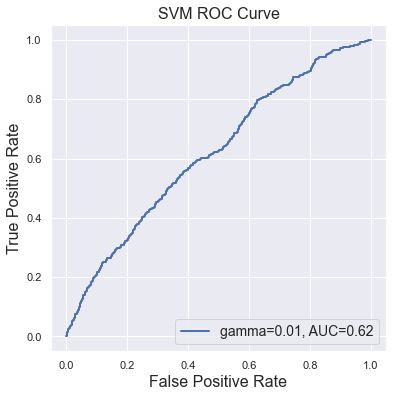

In [41]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [42]:
roc_auc1 = auc
print("AUC1 : {:.2f}".format(roc_auc1))
print("RMSE1 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

AUC1 : 0.62
RMSE1 : 1.11


AUC1 : 0.62
RMSE1 : 1.11


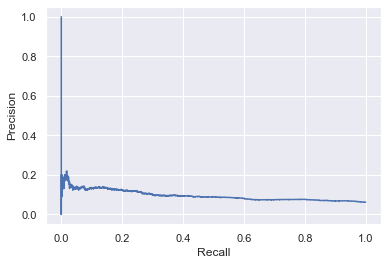

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC1 : {:.2f}".format(roc_auc1))
print("RMSE1 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred,
                                         pos_label=classifier.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC1 : 0.62
RMSE1 : 1.11


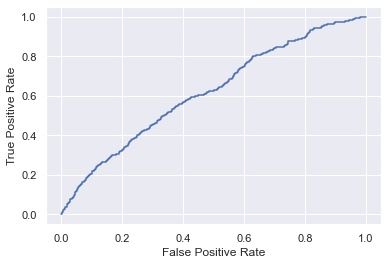

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC1 : {:.2f}".format(roc_auc1))
print("RMSE1 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
fpr, tpr, _ = roc_curve(y_test, y_test_pred, pos_label=classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

[[5654    0]
 [ 368    0]]


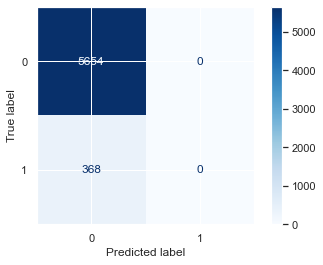

In [45]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)



print(disp.confusion_matrix)

plt.show()

In [46]:
from sklearn.metrics import f1_score
# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_test_pred > 0.5, 1, 0) 
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	F1: 0.000



AUC1 : 0.62
RMSE1 : 1.11


Text(0, 0.5, 'Sensibilite')

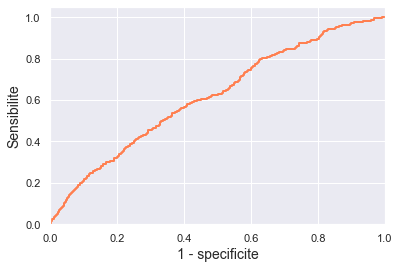

In [47]:
[fpr11, tpr11, thr11] = metrics.roc_curve(y_test, y_test_pred)
print("AUC1 : {:.2f}".format(roc_auc1))
print("RMSE1 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [48]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibilité : 0.95
Spécificité : 0.14
Seuil : -1.11


In [49]:
from sklearn import model_selection
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train_std, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 0.01, 'gamma': 0.01} with a score of 0.70


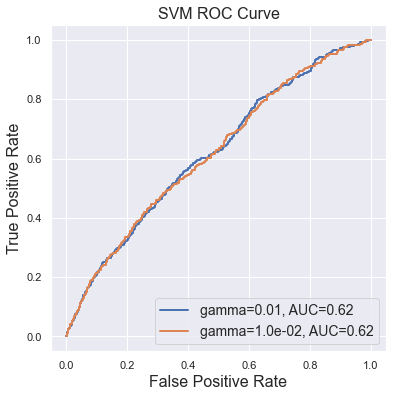

In [50]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv2 = grid.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv2, tpr_cv2, thr_cv2 = metrics.roc_curve(y_test, y_test_pred_cv2)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv2 = metrics.auc(fpr_cv2, tpr_cv2)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv2, tpr_cv2, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv2))
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [51]:
roc_auc2 = auc_cv2
print("AUC2 : {:.2f}".format(roc_auc2))
print("RMSE2 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv2))))

AUC2 : 0.62
RMSE2 : 1.09


AUC2 : 0.62
RMSE2 : 1.09


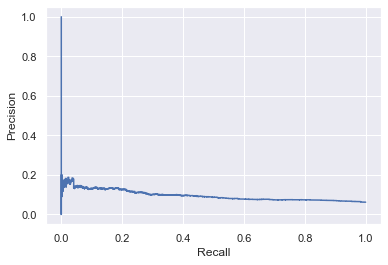

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC2 : {:.2f}".format(roc_auc2))
print("RMSE2 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv2))))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred_cv2,
                                         pos_label=grid.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC2 : 0.62
RMSE2 : 1.09


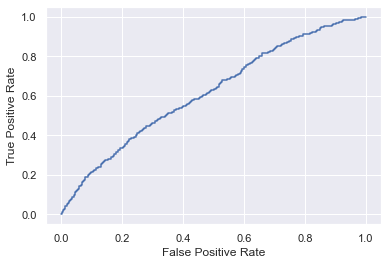

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC2 : {:.2f}".format(roc_auc2))
print("RMSE2 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv2))))
fpr, tpr, _ = roc_curve(y_test, y_test_pred_cv2, pos_label=grid.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

[[5654    0]
 [ 368    0]]


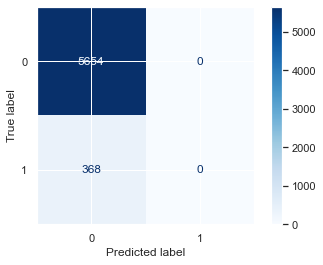

In [54]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, X_test, y_test, cmap=plt.cm.Blues)



print(disp.confusion_matrix)

plt.show()

In [55]:
from sklearn.metrics import f1_score
# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_test_pred_cv2 > 0.5, 1, 0) 
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	F1: 0.000



AUC2 : 0.62
RMSE2 : 1.09


Text(0, 0.5, 'Sensibilite')

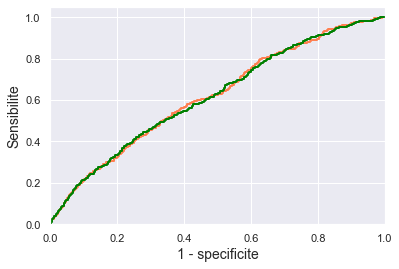

In [56]:
[fpr22, tpr22, thr22] = metrics.roc_curve(y_test, y_test_pred_cv2)
print("AUC2 : {:.2f}".format(roc_auc2))
print("RMSE2 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv2))))
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [57]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx_cv2 = np.min(np.where(tpr_cv2 > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr_cv2[idx_cv2]))
print("Spécificité : {:.2f}".format(1-fpr_cv2[idx_cv2]))
print("Seuil : {:.2f}".format(thr_cv2[idx_cv2]))

Sensibilité : 0.95
Spécificité : 0.14
Seuil : -1.00


In [58]:
gamma =50

In [59]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=50
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=50.00)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

SVC(gamma=50.0)

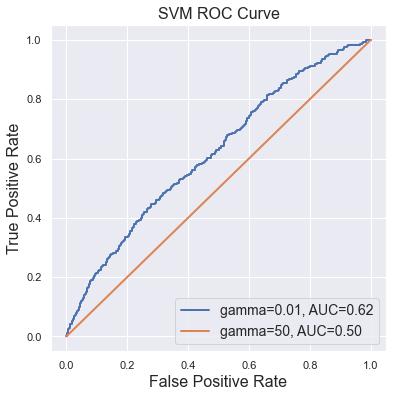

In [60]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv3 = classifier.decision_function(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv3, tpr_cv3, thr_cv3 = metrics.roc_curve(y_test, y_test_pred_cv3)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv3 = metrics.auc(fpr_cv3, tpr_cv3)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr_cv2, tpr_cv2, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc_cv2)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv3, tpr_cv3, '-', lw=2, label='gamma=50, AUC=%.2f' % auc_cv3)

         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [61]:
roc_auc3 = auc_cv3
print("AUC3 : {:.2f}".format(roc_auc3))
print("RMSE3 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv3))))

AUC3 : 0.50
RMSE3 : 1.02


AUC3 : 0.50
RMSE3 : 1.02


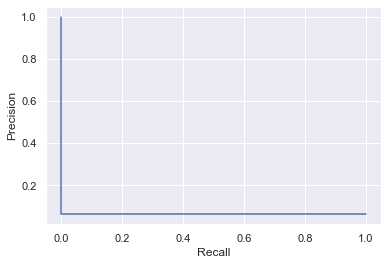

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC3 : {:.2f}".format(roc_auc3))
print("RMSE3 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv3))))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred_cv3,
                                         pos_label=classifier.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC3 : 0.50
RMSE3 : 1.02


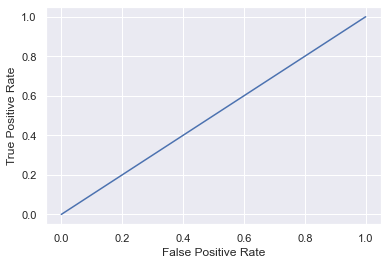

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC3 : {:.2f}".format(roc_auc3))
print("RMSE3 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv3))))
fpr, tpr, _ = roc_curve(y_test, y_test_pred_cv3, pos_label=classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

AUC3 : 0.50
RMSE3 : 1.02


Text(0, 0.5, 'Sensibilite')

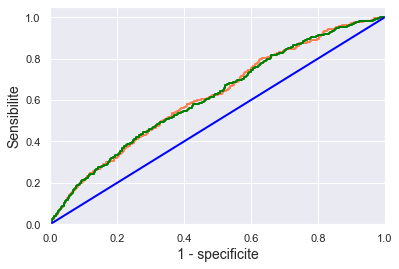

In [64]:
[fpr33, tpr33, thr33] = metrics.roc_curve(y_test, y_test_pred_cv3)
print("AUC3 : {:.2f}".format(roc_auc3))
print("RMSE3 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv3))))
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.plot(fpr33, tpr33, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [65]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx_cv3 = np.min(np.where(tpr_cv3 > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr_cv3[idx_cv3]))
print("Spécificité : {:.2f}".format(1-fpr_cv3[idx_cv3]))
print("Seuil : {:.2f}".format(thr_cv3[idx_cv3]))

Sensibilité : 1.00
Spécificité : 0.00
Seuil : -0.93


# SVM à noyau avec nouvelles features

In [66]:
xnewtrain1 = xnewtrain
xnewtrain1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0.0,0.0,0,0,0,8037,-41,-3,-4,-6
8598,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0.0,0.0,0,0,0,6424,-38,-5,-6,-3
8599,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0.0,1.0,22,1,0,17777,-31,-4,-25,-8
8600,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0.0,3.0,23,1,0,6618,-55,-14,-15,-10


In [67]:
xnewtrain1 = xnewtrain1.drop(xnewtrain1.columns[[1]], axis='columns')
xnewtrain1 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Taux_Endettement,Taux_Endettement_OK,Taux_Endettement_NOK,Reste_A_Vivre,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0.0,3.0,46,0,1,6588,-42,-2,0,-11
1,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0.0,3.0,10,1,0,15475,-44,-11,-2,-4
2,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0.0,4.0,27,1,0,12430,-31,-6,0,-5
3,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0.0,3.0,13,1,0,11434,-38,-12,-1,-12
4,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,0.0,1.0,37,0,1,16164,-31,-1,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,0,0,1,2,112500.0,361462.5,16051.5,274500.0,...,0.0,0.0,0,0,0,8037,-41,-3,-4,-6
8598,456084,0,0,0,1,1,99000.0,675000.0,21906.0,675000.0,...,0.0,0.0,0,0,0,6424,-38,-5,-6,-3
8599,456140,0,0,0,1,1,261000.0,711454.5,47673.0,643500.0,...,0.0,1.0,22,1,0,17777,-31,-4,-25,-8
8600,456195,0,0,0,1,0,94500.0,270000.0,15075.0,270000.0,...,0.0,3.0,23,1,0,6618,-55,-14,-15,-10


In [68]:
# créer la matrice de données
X1 = xnewtrain1.values

# créer le vecteur d'étiquettes
y1 = xnewtrain['TARGET'].values

# transformer en un problème de classification binaire
#y_class = np.where(y<6, 0, 1)
#y_class1 = np.where(y1<1, 0, 1)

In [69]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test sera stratifié


from sklearn import model_selection
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1, y1, stratify=y1, test_size=0.7, random_state=42)

In [70]:
X1

array([[ 1.00083e+05,  0.00000e+00,  1.00000e+00, ..., -2.00000e+00,
         0.00000e+00, -1.10000e+01],
       [ 1.00145e+05,  0.00000e+00,  0.00000e+00, ..., -1.10000e+01,
        -2.00000e+00, -4.00000e+00],
       [ 1.00179e+05,  0.00000e+00,  0.00000e+00, ..., -6.00000e+00,
         0.00000e+00, -5.00000e+00],
       ...,
       [ 4.56140e+05,  0.00000e+00,  0.00000e+00, ..., -4.00000e+00,
        -2.50000e+01, -8.00000e+00],
       [ 4.56195e+05,  0.00000e+00,  0.00000e+00, ..., -1.40000e+01,
        -1.50000e+01, -1.00000e+01],
       [ 4.56226e+05,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
        -6.00000e+00, -2.00000e+00]])

In [71]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

#from sklearn import model_selection
#X_train1, X_test1, y_train1, y_test1 = \
#    model_selection.train_test_split(X1, y_class1, test_size=0.3)

In [72]:
#Standardardisation des données d’entraînement et application de la même transformation aux données de test
from sklearn import preprocessing
std_scale1 = preprocessing.StandardScaler().fit(X_train1)

X_train1_std = std_scale1.transform(X_train1)
X_test1_std = std_scale1.transform(X_test1)

In [73]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train1_std, y_train1)

SVC(gamma=0.01)

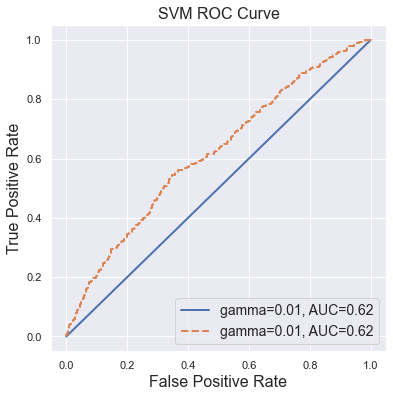

In [74]:
# prédire sur le jeu de test
y_test_pred1nf = classifier.decision_function(X_test1_std)

# construire la courbe ROC
from sklearn import metrics
fpr1_nf, tpr1_nf, thr1_nf = metrics.roc_curve(y_test1, y_test_pred1nf)

# calculer l'aire sous la courbe ROC
auc1nf = metrics.auc(fpr1_nf, tpr1_nf)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.plot(fpr1_nf, tpr1_nf, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc1nf,linestyle='--')

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [75]:
roc_auc1nf = auc1nf
print("AUC1nf : {:.2f}".format(roc_auc1nf))
print("RMSE1nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))))

AUC1nf : 0.62
RMSE1nf : 1.10


AUC1nf : 0.62
RMSE1nf : 1.10


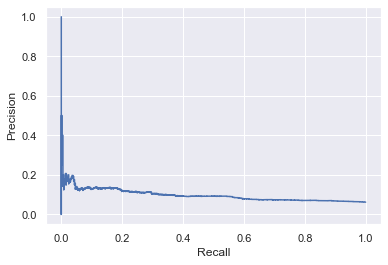

In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC1nf : {:.2f}".format(roc_auc1nf))
print("RMSE1nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))))
prec, recall, _ = precision_recall_curve(y_test, y_test_pred1nf, pos_label=classifier.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC1nf : 0.62
RMSE1nf : 1.10


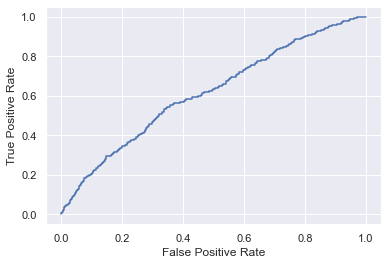

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC1nf : {:.2f}".format(roc_auc1nf))
print("RMSE1nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))))
fpr, tpr, _ = roc_curve(y_test, y_test_pred1nf, pos_label=classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

[[5654    0]
 [ 368    0]]


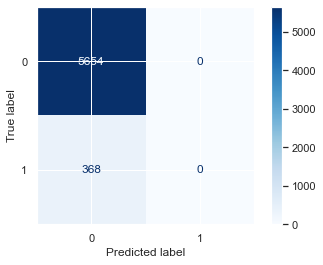

In [78]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test1, y_test1, cmap=plt.cm.Blues)



print(disp.confusion_matrix)

plt.show()

In [79]:
from sklearn.metrics import f1_score
# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_test_pred1nf > 0.5, 1, 0) 
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	F1: 0.000



AUC1 : 0.62
RMSE1 : 1.11


Text(0, 0.5, 'Sensibilite')

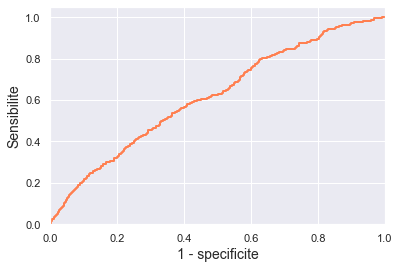

In [80]:
[fpr11nf, tpr11nf, thr11nf] = metrics.roc_curve(y_test1, y_test_pred1nf)
print("AUC1 : {:.2f}".format(roc_auc1))
print("RMSE1 : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
#Avec nouvelles features
#plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

AUC1nf : 0.62
RMSE1nf : 1.10


Text(0, 0.5, 'Sensibilite')

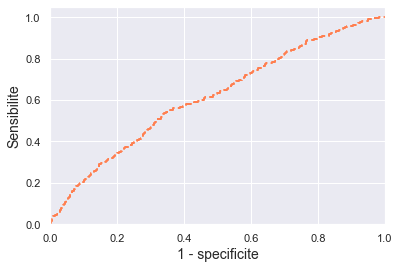

In [81]:
[fpr11nf, tpr11nf, thr11nf] = metrics.roc_curve(y_test1, y_test_pred1nf)
print("AUC1nf : {:.2f}".format(roc_auc1nf))
print("RMSE1nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))))
#Sans nouvelles features
#plt.plot(fpr11, tpr11, color='coral', lw=2)
#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

AUC1 en orange : 0.62
RMSE1 en orange : 1.11
AUC1nf en orange --: 0.62
RMSE1nf en orange --: 1.10


Text(0, 0.5, 'Sensibilite')

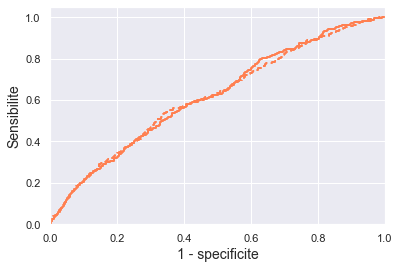

In [82]:
[fpr11nf, tpr11nf, thr11nf] = metrics.roc_curve(y_test1, y_test_pred1nf)
print("AUC1 en orange : {:.2f}".format(roc_auc1))
print("RMSE1 en orange : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print("AUC1nf en orange --: {:.2f}".format(roc_auc1nf))
print("RMSE1nf en orange --: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1nf))))
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [83]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx_nf = np.min(np.where(tpr1_nf > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr1_nf[idx_nf]))
print("Spécificité : {:.2f}".format(1-fpr1_nf[idx_nf]))
print("Seuil : {:.2f}".format(thr1_nf[idx_nf]))

Sensibilité : 0.95
Spécificité : 0.12
Seuil : -1.12


In [84]:
from sklearn import model_selection
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train1_std, y_train1)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1.0, 'gamma': 0.01} with a score of 0.70


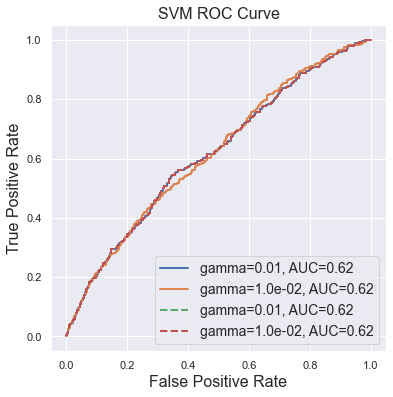

In [85]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv2nf = grid.decision_function(X_test1_std)

# construire la courbe ROC du modèle optimisé
fpr_cv2nf, tpr_cv2nf, thr_cv2nf = metrics.roc_curve(y_test1, y_test_pred_cv2nf)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv2nf = metrics.auc(fpr_cv2nf, tpr_cv2nf)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé précédent
plt.plot(fpr_cv2, tpr_cv2, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv2))
         
# afficher la courbe ROC précédente nouvelle features
plt.plot(fpr1_nf, tpr1_nf, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc1nf,linestyle='--')

# afficher la courbe ROC du modèle optimisé nouvelle features
plt.plot(fpr_cv2nf, tpr_cv2nf, '-', lw=2,linestyle='--', label='gamma=%.1e, AUC=%.2f' % \
         (grid.best_params_['gamma'], auc_cv2nf))

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [86]:
roc_auc2nf = auc_cv2nf
print("AUC2nf : {:.2f}".format(roc_auc2nf))
print("RMSE2nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv2nf))))

AUC2nf : 0.62
RMSE2nf : 1.10


AUC2nf : 0.62
RMSE2nf : 1.10


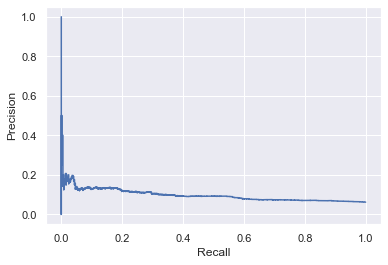

In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC2nf : {:.2f}".format(roc_auc2nf))
print("RMSE2nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv2nf))))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred_cv2nf,
                                         pos_label=grid.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC2nf : 0.62
RMSE2nf : 1.10


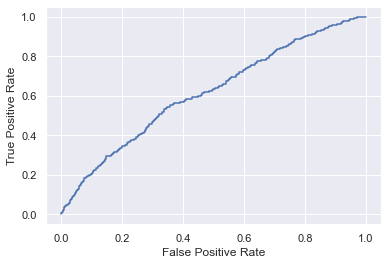

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC2nf : {:.2f}".format(roc_auc2nf))
print("RMSE2nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv2nf))))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred_cv2nf, pos_label=grid.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

[[5654    0]
 [ 368    0]]


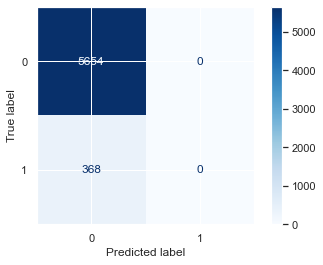

In [89]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, X_test1, y_test1, cmap=plt.cm.Blues)



print(disp.confusion_matrix)

plt.show()

In [90]:
from sklearn.metrics import f1_score
# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred1 = np.where(y_test_pred_cv2nf > 0.5, 1, 0) 
print("\tF1: %1.3f\n" % f1_score(y_test1, y_pred1))

	F1: 0.000



Text(0, 0.5, 'Sensibilite')

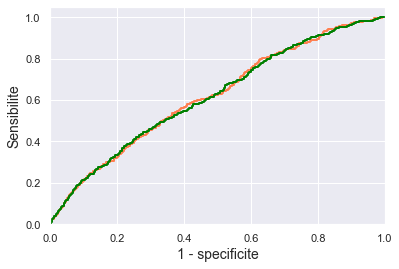

In [91]:
[fpr22nf, tpr22nf, thr22nf] = metrics.roc_curve(y_test1, y_test_pred_cv2nf)
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)

#Avec nouvelles features
#plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
#plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

AUC2nf : 0.62
RMSE2nf : 1.10


Text(0, 0.5, 'Sensibilite')

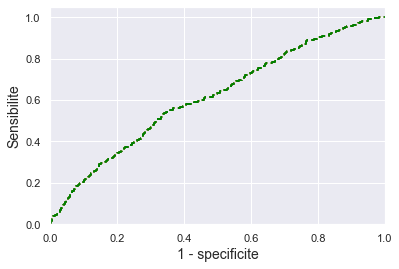

In [92]:
[fpr22nf, tpr22nf, thr22nf] = metrics.roc_curve(y_test1, y_test_pred_cv2nf)
print("AUC2nf : {:.2f}".format(roc_auc2nf))
print("RMSE2nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv2nf))))
#Sans nouvelles features
#plt.plot(fpr11, tpr11, color='coral', lw=2)
#plt.plot(fpr22, tpr22, color='green', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

Text(0, 0.5, 'Sensibilite')

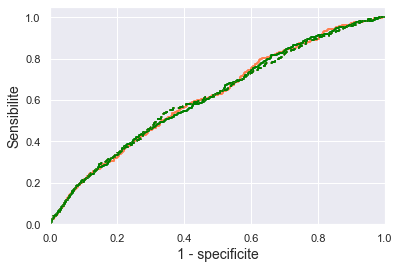

In [93]:
[fpr22nf, tpr22nf, thr22nf] = metrics.roc_curve(y_test1, y_test_pred_cv2nf)
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [94]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx2nf = np.min(np.where(tpr_cv2nf > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr_cv2nf[idx2nf]))
print("Spécificité : {:.2f}".format(1-fpr_cv2nf[idx2nf]))
print("Seuil : {:.2f}".format(thr_cv2nf[idx2nf]))

Sensibilité : 0.95
Spécificité : 0.12
Seuil : -1.12


In [95]:
gamma =50

In [96]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=50
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=50.00)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train1_std, y_train1)

SVC(gamma=50.0)

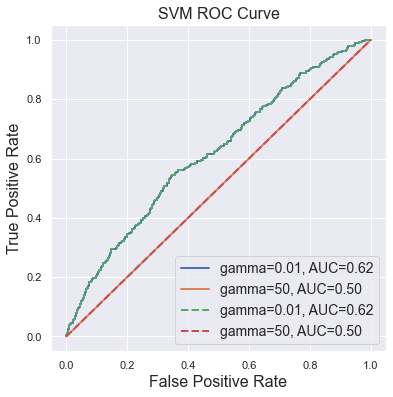

In [97]:
# prédire sur le jeu de test avec le modèle optimisé
y_test_pred_cv3nf = classifier.decision_function(X_test1_std)

# construire la courbe ROC du modèle optimisé
fpr_cv3nf, tpr_cv3nf, thr_cv3nf = metrics.roc_curve(y_test1, y_test_pred_cv3nf)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv3nf = metrics.auc(fpr_cv3nf, tpr_cv3nf)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé précédent
plt.plot(fpr_cv3, tpr_cv3, '-', lw=2, label='gamma=50, AUC=%.2f' % auc_cv3)

# afficher la courbe ROC précédente avec nouvelles features
plt.plot(fpr1_nf, tpr1_nf, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc1nf,linestyle='--')

# afficher la courbe ROC du modèle optimisé avec nouvelles features
plt.plot(fpr_cv3nf, tpr_cv3nf, '-', lw=2, label='gamma=50, AUC=%.2f' % auc_cv3nf,linestyle='--')         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [98]:
roc_auc3nf = auc_cv3nf
print(roc_auc3nf)
print("AUC3nf : {:.2f}".format(roc_auc3nf))
print("RMSE3nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv3nf))))

0.5
AUC3nf : 0.50
RMSE3nf : 1.02


AUC3nf : 0.50
RMSE3nf : 1.02


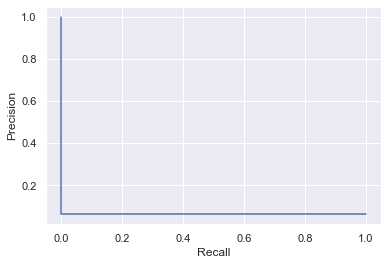

In [99]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
print("AUC3nf : {:.2f}".format(roc_auc3nf))
print("RMSE3nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv3nf))))
prec, recall, _ = precision_recall_curve(y_test1, y_test_pred_cv3nf,
                                         pos_label=classifier.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

AUC3nf : 0.50
RMSE3nf : 1.02


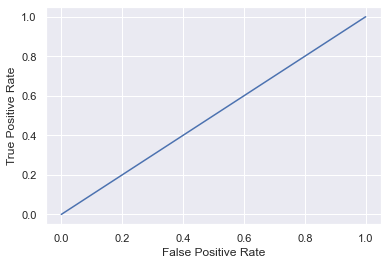

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#y_score = clf.decision_function(X_test)
print("AUC3nf : {:.2f}".format(roc_auc3nf))
print("RMSE3nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv3nf))))
fpr, tpr, _ = roc_curve(y_test1, y_test_pred_cv3nf, pos_label=classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Text(0, 0.5, 'Sensibilite')

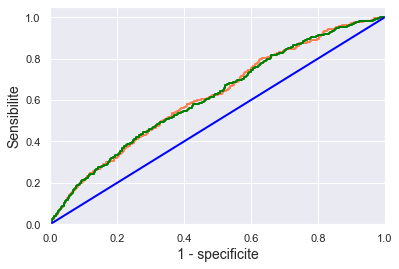

In [101]:
[fpr33nf, tpr33nf, thr33nf] = metrics.roc_curve(y_test1, y_test_pred_cv3nf)
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.plot(fpr33, tpr33, color='blue', lw=2)

#Avec nouvelles features
#plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
#plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
#plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

AUC3nf : 0.50
RMSE3nf : 1.02


Text(0, 0.5, 'Sensibilite')

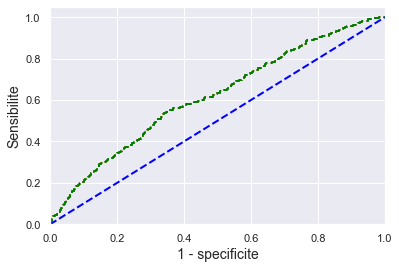

In [102]:
[fpr33nf, tpr33nf, thr33nf] = metrics.roc_curve(y_test1, y_test_pred_cv3nf)
print("AUC3nf : {:.2f}".format(roc_auc3nf))
print("RMSE3nf : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred_cv3nf))))

#Sans nouvelles features
#plt.plot(fpr11, tpr11, color='coral', lw=2)
#plt.plot(fpr22, tpr22, color='green', lw=2)
#plt.plot(fpr33, tpr33, color='blue', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

Text(0, 0.5, 'Sensibilite')

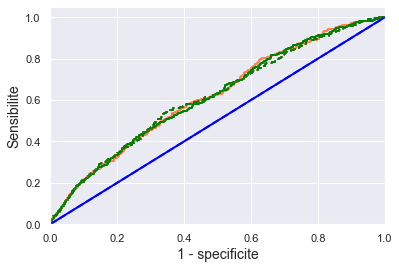

In [103]:
[fpr33nf, tpr33nf, thr33nf] = metrics.roc_curve(y_test1, y_test_pred_cv3nf)
#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.plot(fpr33, tpr33, color='blue', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [104]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx3nf = np.min(np.where(tpr_cv3nf > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr_cv3nf[idx3nf]))
print("Spécificité : {:.2f}".format(1-fpr_cv3nf[idx3nf]))
print("Seuil : {:.2f}".format(thr_cv3nf[idx3nf]))

Sensibilité : 1.00
Spécificité : 0.00
Seuil : -0.93


# Comparaison avec une approche naïve

### Approche naïve sans nouvelles features

In [105]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

Text(0, 0.5, 'Sensibilite')

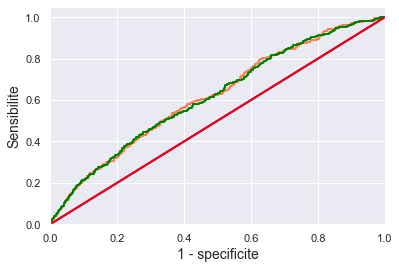

In [106]:
[fpr44, tpr44, thr44] = metrics.roc_curve(y_test, y_pred_random)

#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.plot(fpr33, tpr33, color='blue', lw=2)
plt.plot(fpr44, tpr44, color='red', lw=2)

#Avec nouvelles features
#plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
#plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
#plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
#plt.plot(fpr44nf, tpr44nf, color='red', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

### Approche naïve avec nouvelles features

In [107]:
y_pred_random1 = np.random.randint(np.min(y1), np.max(y1), y_test1.shape)

Text(0, 0.5, 'Sensibilite')

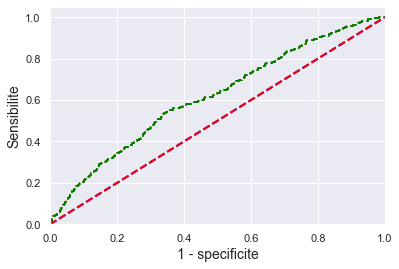

In [108]:
[fpr44nf, tpr44nf, thr44nf] = metrics.roc_curve(y_test1, y_pred_random1)

#Sans nouvelles features
#plt.plot(fpr11, tpr11, color='coral', lw=2)
#plt.plot(fpr22, tpr22, color='green', lw=2)
#plt.plot(fpr33, tpr33, color='blue', lw=2)
#plt.plot(fpr44, tpr44, color='red', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr44nf, tpr44nf, color='red', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

Text(0, 0.5, 'Sensibilite')

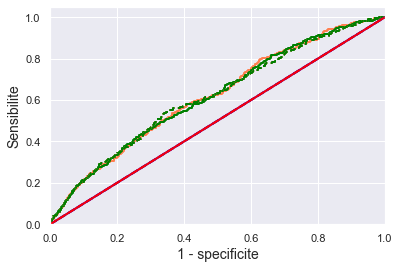

In [109]:
[fpr44nf, tpr44nf, thr44nf] = metrics.roc_curve(y_test1, y_pred_random1)

#Sans nouvelles features
plt.plot(fpr11, tpr11, color='coral', lw=2)
plt.plot(fpr22, tpr22, color='green', lw=2)
plt.plot(fpr33, tpr33, color='blue', lw=2)
plt.plot(fpr44, tpr44, color='red', lw=2)

#Avec nouvelles features
plt.plot(fpr11nf, tpr11nf, color='coral', lw=2,linestyle='--')
plt.plot(fpr22nf, tpr22nf, color='green', lw=2,linestyle='--')
plt.plot(fpr33nf, tpr33nf, color='blue', lw=2,linestyle='--')
plt.plot(fpr44nf, tpr44nf, color='red', lw=2,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)